# Add mess to Iris dataset

Recording **datasets from real applications** is always associated with several problems. Real measured values are always subject to a certain **level of measurement noise**. Furthermore, when recording the measured values, there may be sporadic dropouts of the measurement sensors, which leads to **gaps in the dataset**. And finally, **doubles**, i.e. several identical measurements, can occur when merging several measurement series from different experiments.

These problems from the real measuring everyday life are to be shown by the example of the Iris dataset. Unfortunately, this dataset is a little "too perfect". Therefore, for didactic reasons, the dataset will be somewhat "messed up" in the following subsections.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set font sizes of figure title, axes and labels 
# globally via a rcParams dictionary
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize':   'x-large',
         'axes.titlesize':   'xx-large',
         'xtick.labelsize':  'large',
         'ytick.labelsize':  'large',
         'axes.edgecolor':   '#000000'}
pylab.rcParams.update(params)

In [3]:
# Import Iris dataset for classification
irisdata_df_orig = pd.read_csv('../datasets/IRIS_flower_dataset_kaggle.csv')

## Add Gaussian noise to features

To simulate **real measurement values**, some **Gaussian noise** with a defined **standard deviation $\sigma$** is added to the features of the Iris dataset. To simulate an **offset** due to **imperfectly calibrated measurement devices**, for example, the mean value could additionally be shifted. However, because this has **no influence on the classifiability**, it is omitted here.

In [5]:
# Get number of rows of the dataset
n_rows = irisdata_df_orig.shape[0]

# Get number of columns of the dataset
# Omit last column with the classnames
n_cols = irisdata_df_orig.shape[1] - 1

#n_cols

In [16]:
# mean: "centre" of the distribution
# sigma: standard deviation (spread or “width”) of the distribution
mean, sigma = 0, 0.1

# Create noise with the same dimension as the dataset
# Set 'seed' to something, to make the output of the random generator reproducible
np.random.seed(42)
irisdata_np_noise = np.random.normal(mean, sigma, (n_rows, n_cols))

irisdata_np_noise

array([[ 0.04967142, -0.01382643,  0.06476885,  0.15230299],
       [-0.02341534, -0.0234137 ,  0.15792128,  0.07674347],
       [-0.04694744,  0.054256  , -0.04634177, -0.04657298],
       [ 0.02419623, -0.19132802, -0.17249178, -0.05622875],
       [-0.10128311,  0.03142473, -0.09080241, -0.14123037],
       [ 0.14656488, -0.02257763,  0.00675282, -0.14247482],
       [-0.05443827,  0.01109226, -0.11509936,  0.0375698 ],
       [-0.06006387, -0.02916937, -0.06017066,  0.18522782],
       [-0.00134972, -0.10577109,  0.08225449, -0.12208436],
       [ 0.02088636, -0.19596701, -0.1328186 ,  0.01968612],
       [ 0.07384666,  0.01713683, -0.01156483, -0.03011037],
       [-0.1478522 , -0.07198442, -0.04606388,  0.10571222],
       [ 0.03436183, -0.17630402,  0.0324084 , -0.03850823],
       [-0.0676922 ,  0.06116763,  0.10309995,  0.09312801],
       [-0.08392175, -0.03092124,  0.03312634,  0.09755451],
       [-0.04791742, -0.0185659 , -0.1106335 , -0.11962066],
       [ 0.08125258,  0.

In [17]:
# Select columns 1-4 with all rows
# and convert it to numpy array
irisdata_np_orig = irisdata_df_orig.iloc[:, 0:4].to_numpy()

#irisdata_np_orig

In [18]:
# Add noise to original values
irisdata_np_noised = irisdata_np_orig + irisdata_np_noise

#irisdata_np_noised

In [19]:
# Make a deep copy of original dataframe
irisdata_df_noised = irisdata_df_orig.copy(deep=True)

# Replace values of dataframe with noisy values from array 
irisdata_df_noised.iloc[:, 0:4] = irisdata_np_noised

irisdata_df_noised

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.149671,3.486174,1.464769,0.352303,Iris-setosa
1,4.876585,2.976586,1.557921,0.276743,Iris-setosa
2,4.653053,3.254256,1.253658,0.153427,Iris-setosa
3,4.624196,2.908672,1.327508,0.143771,Iris-setosa
4,4.898717,3.631425,1.309198,0.058770,Iris-setosa
...,...,...,...,...,...
145,6.733850,2.958471,5.263278,2.527069,Iris-virginica
146,6.318187,2.524822,4.954064,1.815016,Iris-virginica
147,6.583034,2.914392,5.207157,1.952234,Iris-virginica
148,6.247898,3.433366,5.503754,2.248998,Iris-virginica


In [20]:
# Define a function to visualize data as pairs plots
def plotPairs(df, title):
    g = sns.pairplot(df, diag_kind="kde", hue='species', 
                     palette='Dark2', height=2.5)

    g.map_lower(sns.kdeplot, levels=4, color=".2")
    # y .. padding between title and plot
    g.fig.suptitle(title, y=1.05)
    plt.show()

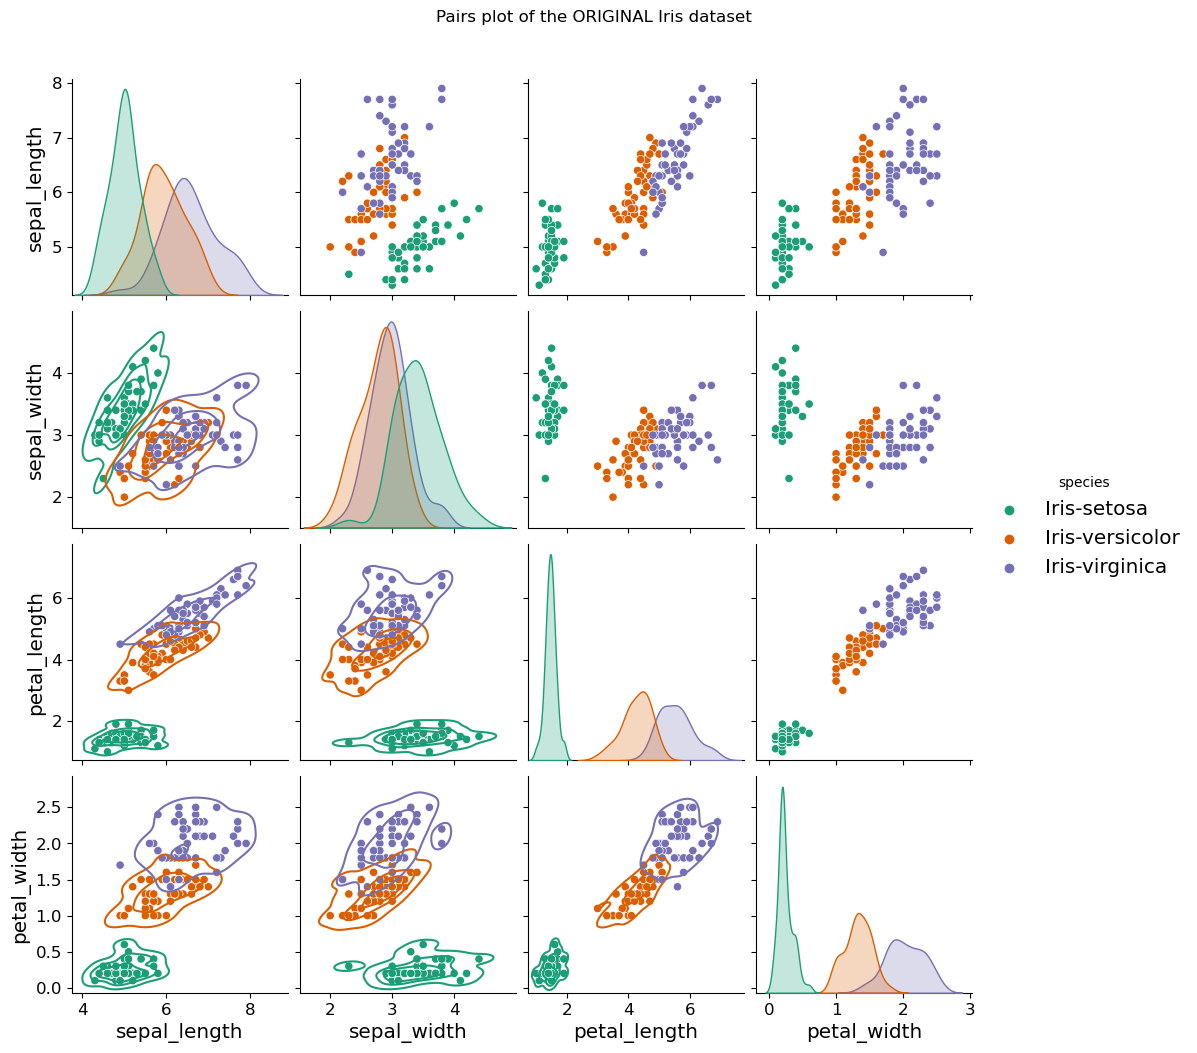

In [21]:
title = 'Pairs plot of the ORIGINAL Iris dataset'
plotPairs(irisdata_df_orig, title)

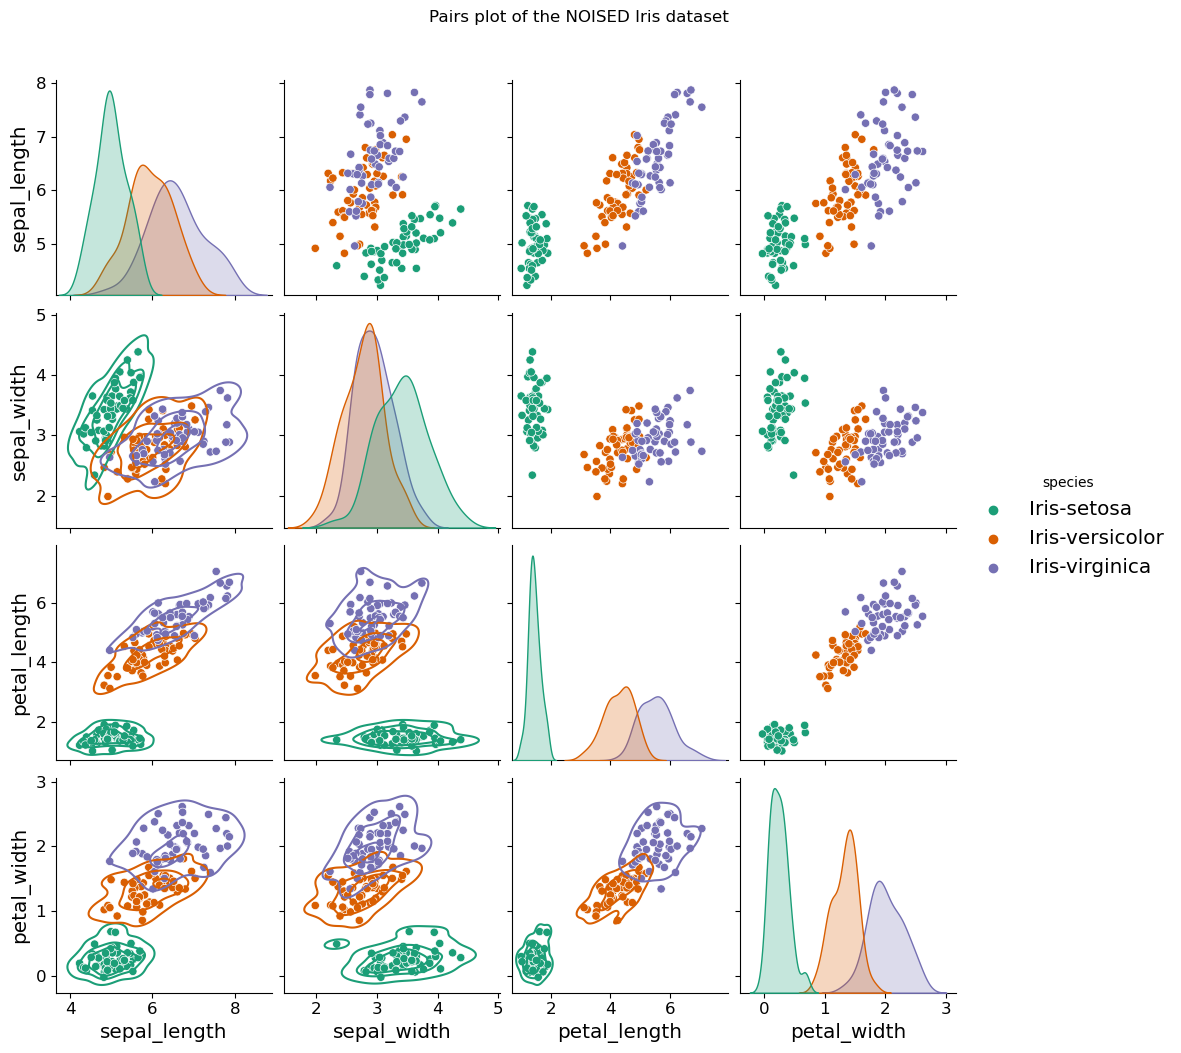

In [22]:
title = 'Pairs plot of the NOISED Iris dataset'
plotPairs(irisdata_df_noised, title)

In [23]:
# Save noised Iris dataset to CSV file without index
irisdata_df_noised.to_csv('../datasets/IRIS_flower_dataset_kaggle_noised.csv', sep=',', index=False)

## Add random gaps

## Add random duplicates